# Николаев Евгений Алексеевич, группа 22.M08

## Вариант 29

### Практическое задание 4. Проверка независимости качественных признаков


Данные data_big.csv о финских алкоголиках, переменные - признаки в первый день отказа от запоя:

В соответствии со своим вариантом выбираете зависимую переменную, остальные рассматриваете вкачестве независимых. Независимые категориальные переменные упорядочить по значимости влиянияна зависимую переменную. Привести соответствующие частоты, значимости критреия хи-квадрат иточного критерия Фишера. По совместному распределению первых двух наиболее значимых переменныхвычисляете односторонний коэффициент неопределенности относительно зависимой переменной.

Мой вариант: В качестве зависимой выбрана переменная diarrhea.1

### Импортирую библиотеки

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats

### Загружаю данные (файл)

In [29]:
df = pd.read_csv(open('data_big.csv'), sep=',')
df = df.drop(df.columns[0], axis=1)
df.columns = df.columns.str.replace('"', '')
df = df.loc[:,:'TPR.1']
df = df.drop(columns=['X.1'])

### Масштабирую входные данные для получения бинарных значений

In [30]:
from sklearn.preprocessing import StandardScaler

df = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
# Будем считать, что все значения меньше 0.6 равны 0, а все значения больше 0.6, равны 1
# (выбрано после просмотра данных на основе того, что в среднем значения были в диапазоне от -1 до 2)
replace_func = lambda x: 0 if x < 0.6 else 1
df = df.applymap(replace_func)

### Cоздание таблицы сопряженности по каждой переменной:

Для оценки значимости влияния каждой из переменных на зависимую переменную diarrhea.1 проведем статистический анализ категориальных переменных в pandas DataFrame df. Для этого вычислим критерий хи-квадрат, который позволит нам получить значения критерия хи-квадрат, степени свободы и p-value. Также воспользуемся критерием Фишера, чтобы получить дополнительные значения p-value.

Полученные значения помогут определить переменные, которые имеют наибольшую связь с зависимой переменной diarrhea.1. Таким образом, мы сможем выявить наиболее значимые факторы, влияющие на появление данного заболевания.

In [31]:
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
# создаем словарь таблиц сопряженности для каждой категориальной переменной
contingency_tables = {}
# создаем словарь для результатов теста хи-квадрат
chi2_results = {}
# создаем словарь для результатов теста Фишера
fisher_results = {}

В первом этапе анализа мы создаем таблицы сопряженности для каждой категориальной переменной в DataFrame df относительно зависимой переменной diarrhea.1. Такие таблицы позволяют произвести кросс-табуляцию двух переменных и определить частоты различных комбинаций категорий.

In [32]:
for col in df.columns[1:-1]:
    contingency_tables[col] = pd.crosstab(df[col], df['diarrhea.1'])

Во втором этапе анализа мы вычисляем статистику хи-квадрат, степени свободы, p-значение и ожидаемые частоты для каждой таблицы сопряженности с помощью функции chi2_contingency из модуля scipy.stats. Результаты вычислений сохраняются в словаре chi2_results.

In [33]:
for var, ct in contingency_tables.items():
    chi2, p, dof, expected_freq = chi2_contingency(ct)
    chi2_results[var] = (chi2, p, dof, expected_freq)
    fisher_results[var] = fisher_exact(ct)[1]

Далее, мы сортируем результаты теста хи-квадрат и теста Фишера по убыванию степени статистической значимости и сохраняем их в переменные sorted_chi2 и sorted_fisher_p соответственно.

Такой подход позволяет нам определить наиболее значимые факторы, влияющие на появление диареи, на основе полученных результатов тестов.

In [34]:
sorted_chi2 = sorted(chi2_results.items(), key=lambda x: x[1][0], reverse=True)
sorted_fisher_p = sorted(fisher_results.items(), key=lambda x: x[1], reverse=True)

Выводим результат по критерию хи-квадрат

In [35]:
for i in range(1, len(sorted_chi2)):
    print('Chi-square', sorted_chi2[i][0], sorted_chi2[i][1][0])

Chi-square craving.to.alcohol.1 5.93182603686636
Chi-square combined2.1 4.62029569892473
Chi-square suspiciousness.1 3.497101814516129
Chi-square MBP.1 2.986633064516129
Chi-square SBP.1 1.6633064516129035
Chi-square thirst.1 1.1305366004962782
Chi-square transient.hallusinations.1 0.652016129032258
Chi-square weakness.1 0.5992795303605314
Chi-square insomia.1 0.5992795303605314
Chi-square anxiety.1 0.3315141824249166
Chi-square combined1.1 0.1606278801843318
Chi-square irritability.1 0.11880760368663593
Chi-square polyuria.1 0.018278092874867057
Chi-square vomiting.1 0.018278092874867057
Chi-square SV.1 0.005544354838709667
Chi-square SI.1 0.005544354838709667
Chi-square headache.1 0.0
Chi-square tremor.1 0.0
Chi-square sweating.1 0.0
Chi-square anoreksia.1 0.0
Chi-square chest.pain.1 0.0
Chi-square hyperemia.1 0.0
Chi-square HR.1 0.0
Chi-square DBP.1 0.0
Chi-square CO.1 0.0
Chi-square CI.1 0.0


In [36]:
# Сохраним на будущее для вычисления одностороннего критерия неопределенности
top2_vars = sorted_chi2[1:3]

Можно заметить, что самыми значимыми являются:

craving.to.alcohol.1 (5.93182603686636)

combined2.1 (4.62029569892473)

### Применяю критерий Фишера

In [37]:
for i in range(0, len(sorted_fisher_p)):
    if sorted_fisher_p[i][0] != 'diarrhea.1':
        print('Fisher',sorted_fisher_p[i][0],sorted_fisher_p[i][1])

Fisher headache.1 1.0
Fisher tremor.1 1.0
Fisher anoreksia.1 1.0
Fisher chest.pain.1 1.0
Fisher HR.1 1.0
Fisher SV.1 1.0
Fisher CO.1 1.0
Fisher SI.1 1.0
Fisher CI.1 1.0
Fisher irritability.1 0.5227272727272727
Fisher hyperemia.1 0.5208333333333335
Fisher sweating.1 0.47727272727272724
Fisher DBP.1 0.47727272727272724
Fisher polyuria.1 0.384469696969697
Fisher vomiting.1 0.384469696969697
Fisher combined1.1 0.2840909090909091
Fisher anxiety.1 0.23106060606060605
Fisher weakness.1 0.22727272727272727
Fisher insomia.1 0.22727272727272727
Fisher transient.hallusinations.1 0.17613636363636365
Fisher thirst.1 0.14772727272727273
Fisher SBP.1 0.10416666666666667
Fisher suspiciousness.1 0.06060606060606061
Fisher MBP.1 0.053030303030303025
Fisher combined2.1 0.02840909090909091
Fisher craving.to.alcohol.1 0.01893939393939394


Как можно заметить, результат абсолютно зеркален результату по Хи-квадрат

Для удобства сравнения создаю гистограмму.


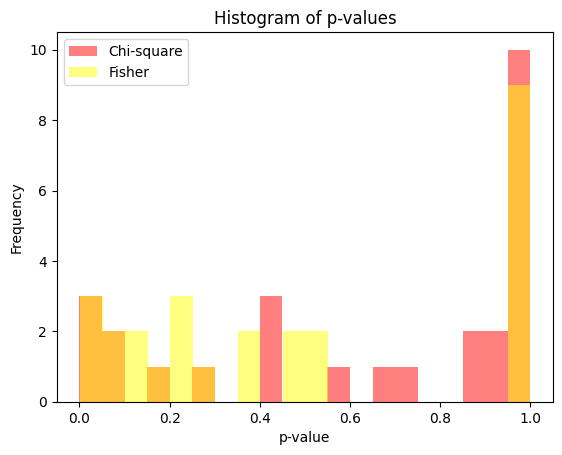

In [38]:
import matplotlib.pyplot as plt

chi2_p_values = [x[1][1] for x in sorted_chi2]
fisher_p_values = [x[1] for x in sorted_fisher_p]

plt.hist(chi2_p_values, bins=20, alpha=0.5, color='red', label='Chi-square')
plt.hist(fisher_p_values, bins=20, alpha=0.5, color='yellow', label='Fisher')
plt.title('Histogram of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Если ни одна из независимых переменных не оказывает влияния на целевую переменную, то мы можем ожидать, что распределение p-значений будет равномерным, то есть вероятность получения любого значения p-значения будет одинаковой. Однако, если какая-то из независимых переменных действительно влияет на целевую переменную, то мы можем ожидать, что соответствующее p-значение будет низким, что указывает на высокую значимость наблюдаемой статистики на заданном уровне значимости.

### По совместному распределению первых двух наиболее значимых переменных вычислим односторонний коэффициент неопределенности относительно зависимой переменной.

In [48]:
# таблицы сопряженности для двух пар переменных
ct_top1_diarrhea = pd.crosstab(df[top2_vars[0][0]], df['diarrhea.1'])
ct_top2_diarrhea = pd.crosstab(df[top2_vars[1][0]], df['diarrhea.1'])

marginal_top1 = ct_top1_diarrhea.sum(axis=1)
marginal_diarrhea = ct_top1_diarrhea.sum(axis=0)
marginal_top2 = ct_top2_diarrhea.sum(axis=1)
# общее количество наблюдений в данных.
n = ct_top1_diarrhea.sum().sum()
# INU1 и INU2 - односторонний критерий неопределенности
# Для первой значимой переменной
H1 = -np.sum((ct_top1_diarrhea/n)*np.log2(ct_top1_diarrhea/n)) + np.sum((marginal_top1/n)*np.log2(marginal_top1/n))+ np.sum((marginal_diarrhea/n)*np.log2(marginal_diarrhea/n))
I1 = H1 - np.sum(chi2_contingency(ct_top1_diarrhea)[3]/n*np.log2(chi2_contingency(ct_top1_diarrhea)[3]/n))
INU1 = I1/np.max([marginal_top1.sum()/n, marginal_diarrhea.sum()/n])
# Для второй значимой переменной
H2 = -np.sum((ct_top2_diarrhea/n)*np.log2(ct_top2_diarrhea/n)) + np.sum((marginal_top2/n)*np.log2(marginal_top2/n))+ np.sum((marginal_diarrhea/n)*np.log2(marginal_diarrhea/n))
I2 = H2 - np.sum(chi2_contingency(ct_top2_diarrhea)[3]/n*np.log2(chi2_contingency(ct_top2_diarrhea)[3]/n))
INU2 = I2/np.max([marginal_top2.sum()/n, marginal_diarrhea.sum()/n])
print(f'Односторонний кф неопределенности для переменной: {top2_vars[0][0]}')
print('0:', INU1[0])
print('1:', INU1[1])
print(f'Односторонний кф неопределенности для переменной: {top2_vars[1][0]}')
print('0:', INU2[0])
print('1:', INU2[1])

Односторонний кф неопределенности для переменной: craving.to.alcohol.1
0: 0.5156179509192629
1: 0.24511479511263368
Односторонний кф неопределенности для переменной: combined2.1
0: 0.6058865194454062
1: 0.24511479511263357


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


Таким образом, значения INU, которые получили, указывают на то, чтопеременная combined2.1 имеет более
высокую информативность, чем переменная craving.to.alcohol.1, для предсказания целевой переменной. В
частности, для модальности 0 переменной combined2.1 значение INU выше, чем для модальности 0
переменной craving.to.alcohol.1, что говорит о более сильной связи между переменной combined2.1 и целевой
переменной для этой модальности. Однако, для модальности 1 значения INU для обеих переменных примерно
одинаковы, что говорит о более слабой связи между переменными и целевой переменной для этой
модальности.